### Generate Sample and population

In [16]:
import numpy as np
import scipy.stats as stats

np.random.seed(6)

# Generate random values from Poisson distribution with lowest x value=18, mean=35 and sample size=150000
national_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
#generate random values from Poisson distribution with lowest x value=18, mean=10 and sample size=100000
national_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
national_ages = np.concatenate((national_ages1, national_ages2))

# Generate random values from Poisson distribution with lowest x value=18, mean=30 and sample size=30
east_java_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
#generate random values from Poisson distribution with lowest x value=18, mean=10 and sample size=20
east_java_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
east_java_ages = np.concatenate((east_java_ages1, east_java_ages2))

print( national_ages.mean() )
print( east_java_ages.mean() )

43.000112
39.26


(array([1.24456338e-02, 3.92535211e-02, 5.24619718e-03, 1.07470423e-02,
        3.46884507e-02, 2.95307042e-02, 8.12788732e-03, 7.73521127e-04,
        3.04225352e-05, 1.69014085e-06]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

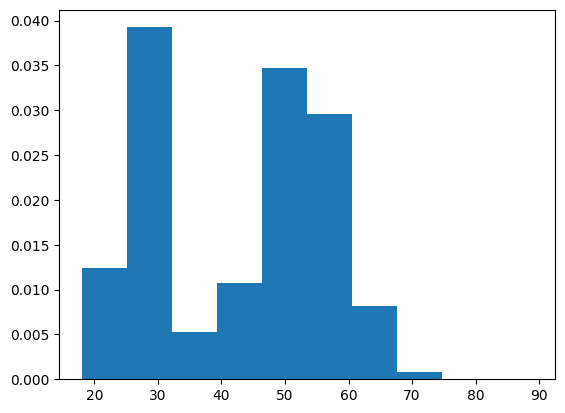

In [17]:
import matplotlib.pyplot as plt

plt.hist(national_ages, density=True)

### Do One-Sample T-Test

In [18]:
stats.ttest_1samp(a = east_java_ages,               # Sample data
                 popmean = national_ages.mean())    # Pop mean

TtestResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678, df=49)

### Conduct a t-test at a 95% confidence level

In [19]:
# Degrees of freedom (total sample - 1)
df = east_java_ages.shape[0] - 1

stats.t.ppf(q=0.025,  # Quantile to check
            df=df)  

-2.0095752371292397

In [20]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=df)

2.0095752371292397

### Another way to get p-value (using stats.t.cdf() method)

In [21]:
stats.t.cdf(x=-2.5742714883655027,   # from t-test statistic
               df=df) * 2            # The alternative hypothesis we are checking is whether the sample mean differs 
                                     # (is not equal to) the population mean, since the sample could differ in either the positive 
                                     # or negative direction we multiply the by two

0.013118685425061678

### If we were to construct a 95% confidence interval for the sample it would not capture (national) population mean of 43

In [22]:
import math

sigma = east_java_ages.std()/math.sqrt(east_java_ages.shape[0])  # Sample stdev/sample size

stats.t.interval(0.95,                                           # Confidence level
                 df = df,                                        # Degrees of freedom
                 loc = east_java_ages.mean(),                    # Sample mean
                 scale= sigma)                                   # Standard dev estimate

(36.36966907692507, 42.150330923074925)

### If we were to construct a 99% confidence interval, it would capture the (national) population mean

In [23]:
stats.t.interval(0.99,                                           # Confidence level
                 df = df,                                        # Degrees of freedom
                 loc = east_java_ages.mean(),                    # Sample mean
                 scale= sigma)                                   # Standard dev estimate

(35.40547994092107, 43.11452005907893)